
### Initial Steps
1. Go to Datahack website at https://datahack.analyticsvidhya.com/contest/hacklive-guided-community-hackathon/#

2. Download the Dataset.

3. Read using pandas


### About the Data

#### Can you predict the Number of Likes a Youtube Video will get ?

As YouTube becomes one of the most popular video-sharing platforms, YouTuber is developed as a new type of career in recent decades. YouTubers earn money through advertising revenue from YouTube videos, sponsorships from companies, merchandise sales, and donations from their fans. In order to maintain a stable income, the popularity of videos become the top priority for YouTubers. Meanwhile, some of our friends are YouTubers or channel owners in other video-sharing platforms. This raises our interest in predicting the performance of the video. If creators can have a preliminary prediction and understanding on their videos’ performance, they may adjust their video to gain the most attention from the public.

You have been provided details on videos along with some features as well. Can you accurately predict the number of likes for each video using the set of input variables?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
train = pd.read_csv('train_hack2_AV.csv')
test = pd.read_csv('test_hack2_AV.csv')
sample = pd.read_csv('sample_hack2_AV.csv')

<img src = 'hack2.png'/>


### Hypothesis Generation
Simply put, a hypothesis is a possible view or assertion of an analyst about the problem he or she is working upon. It may be true or may not be true.

- Do videos with more views get more likes ?
- Do videos with more comments get more likes ?
- Do with videos with more dislikes get less likes ?
- Do longer videos get more likes than shorter videos ?
- Do descriptive videos get more number of likes ?
- Does a channel affect the number of likes?
- Does the country of origin affect the number of likes ?
- Do people post more videos on weekends than weekdays ?

In [3]:
train.sample(1
            )

,video_id,title,channel_title,category_id,publish_date,tags,views,dislikes,comment_count,description,country_code,likes
10315,3630,Studio Round 01 | Miss PTC Punjabi 2017 | Full...,PTC Punjabi,24.0,2017-12-12,"Ptc Punjabi ptc motion pictures|""ptc""|""punjabi...",40153.0,38.0,82.0,PTC Punjabi - WORLD’S NO.1 PUNJABI TELEVISION ...,CA,540.0


In [4]:
data = train.copy()
data.sort_values(by = 'likes', inplace = True)
data = data.dropna()

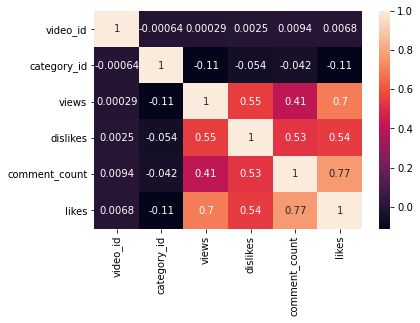

In [5]:
sns.heatmap(train.corr(), annot= True)

### Do videos with more views get more likes ?

In [6]:
from sklearn.preprocessing import MinMaxScaler

In [7]:
mm =MinMaxScaler()

In [8]:
tranform_data = train[['likes', 'views']]

In [9]:
tranform_data[tranform_data.columns] = mm.fit_transform(tranform_data)

<ipython-input-9-180e68c5f576>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tranform_data[tranform_data.columns] = mm.fit_transform(tranform_data)
/home/paramathma/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:2969: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.loc._setitem_with_indexer((slice(None), indexer), value)
/home/paramathma/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:2935: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.p

Text(0.5, 1.0, 'Distribution of likes and Views')

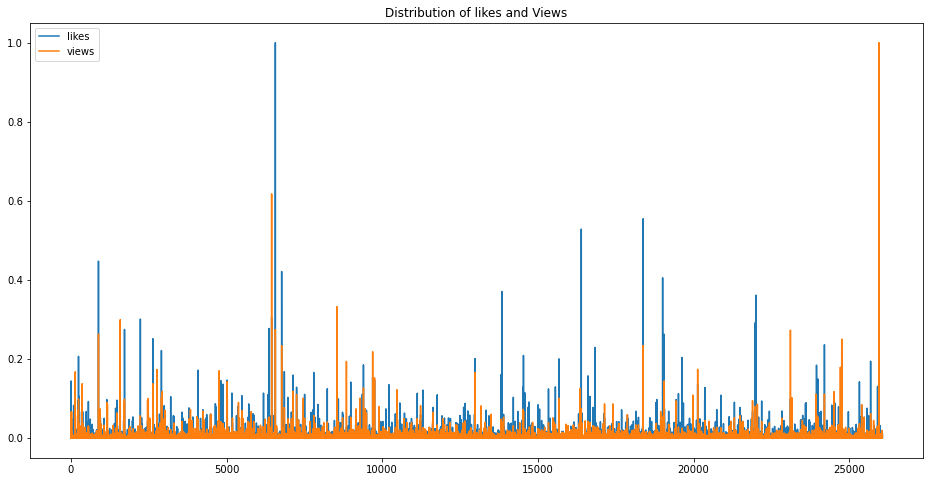

In [10]:
plt.figure(figsize=(16,8))
plt.plot(tranform_data.likes, label = 'likes')
plt.plot(tranform_data.views, label = 'views')
plt.legend()
plt.title('Distribution of likes and Views')


### Do with videos with more dislikes get less likes ?

In [11]:
tranform_data1 = train[['dislikes', 'likes']]

In [12]:
tranform_data1[tranform_data1.columns] = mm.fit_transform(tranform_data1)

<ipython-input-12-82ce29c45128>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tranform_data1[tranform_data1.columns] = mm.fit_transform(tranform_data1)
/home/paramathma/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:2969: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.loc._setitem_with_indexer((slice(None), indexer), value)
/home/paramathma/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:2935: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

Text(0.5, 1.0, 'Distribution of likes and dislikes')

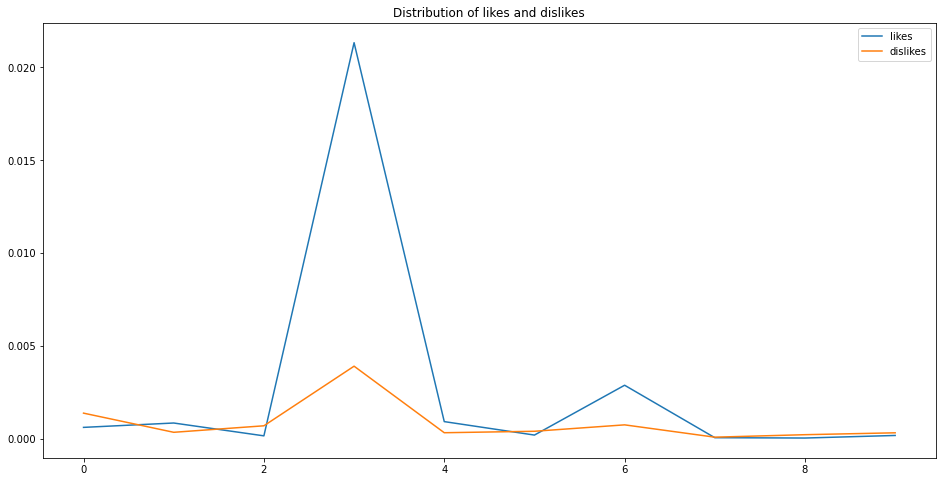

In [13]:
plt.figure(figsize=(16,8))
plt.plot(tranform_data1.likes[:10], label = 'likes')
plt.plot(tranform_data1.dislikes[:10], label = 'dislikes')
plt.legend()
plt.title('Distribution of likes and dislikes')

### Do longer videos get more likes than shorter videos ?

In [14]:
data.columns

Index(['video_id', 'title', 'channel_title', 'category_id', 'publish_date',
       'tags', 'views', 'dislikes', 'comment_count', 'description',
       'country_code', 'likes'],
      dtype='object')

Text(0.5, 1.0, 'Distibution likes with respect to Length of video')

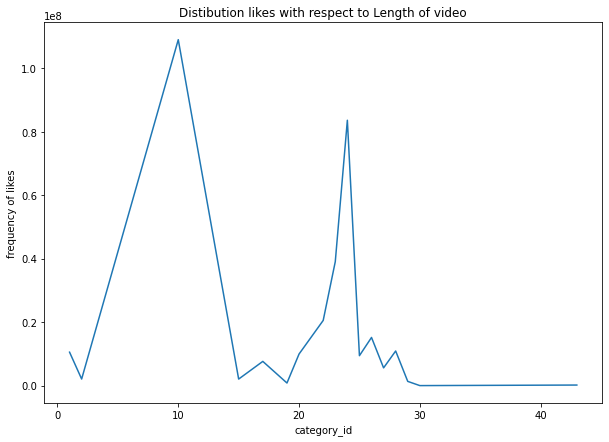

In [15]:
plt.figure(figsize = (10,7))
data.groupby('category_id').likes.sum().plot()
plt.ylabel('frequency of likes')
plt.title('Distibution likes with respect to Length of video')

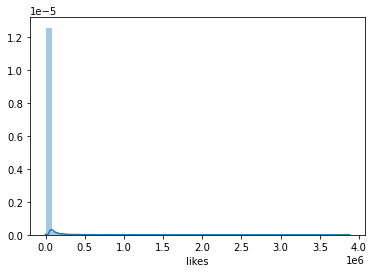

In [16]:
sns.distplot(train.likes)

In [17]:
train.likes.skew()

26.36605568219861

#### Since the skewness is high hence we are doing the logarthemic transformation to make the curve normally distributed

In [18]:
train.likes = np.log1p(train.likes)

-0.3125543615908428


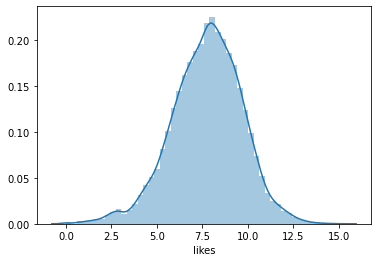

In [19]:
print(train.likes.skew())
sns.distplot(train.likes)


Now the data seems like normally distributed

#### Lets see the same for box plot
1. Without logarthemic transformation
2. With logarthemic transforamtion

#### Without logarthemic transformation

Text(0.5, 1.0, 'likes boxplot with original data ')

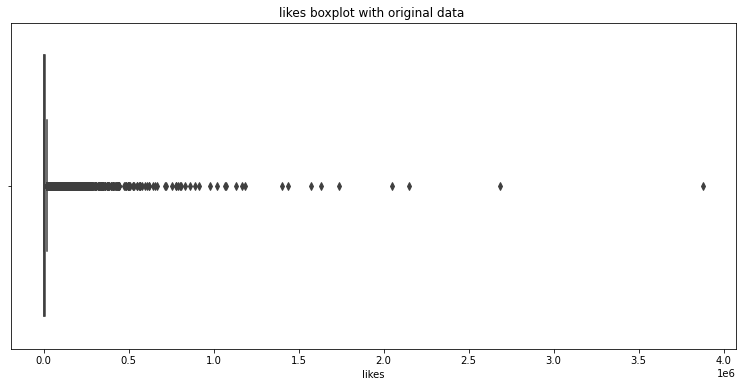

In [20]:
plt.figure(figsize=(13,6))
sns.boxplot(x = 'likes', data = data)

plt.title('likes boxplot with original data ')

#### with Logarthemic transformation

Text(0.5, 1.0, 'likes box plot')

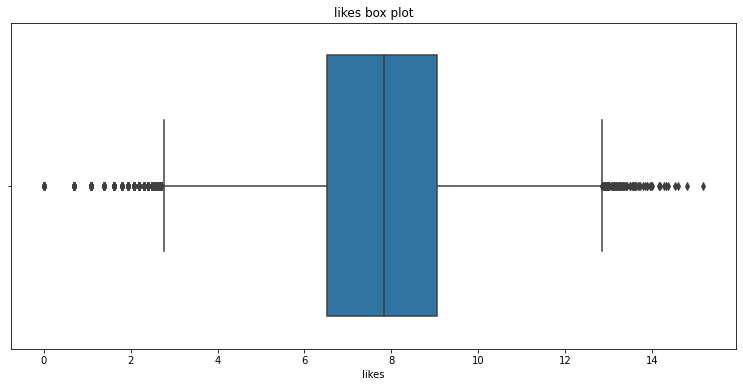

In [21]:
plt.figure(figsize= (13,6))
sns.boxplot(x = 'likes', data = train)
plt.title('likes box plot')

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26061 entries, 0 to 26060
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   video_id       26061 non-null  int64  
 1   title          26061 non-null  object 
 2   channel_title  26061 non-null  object 
 3   category_id    26061 non-null  float64
 4   publish_date   26061 non-null  object 
 5   tags           26061 non-null  object 
 6   views          26061 non-null  float64
 7   dislikes       26061 non-null  float64
 8   comment_count  26061 non-null  float64
 9   description    26061 non-null  object 
 10  country_code   26061 non-null  object 
 11  likes          26061 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 2.4+ MB


There are 4 types of features that we have:

1. Numerical
2. Categorical
3. Textual
4. DateTime


Also our target is Continuous

For each feature type we will be perform two types of analysis:

1. Univariate: Analyze 1 feature at a time

2. Bivariate: Analyze the relationship of that feature with target variable, i.e. 'likes'




### Numerical variables 

In [23]:
num_col   = train[['views', 'dislikes', 'comment_count', 'likes']]

In [24]:
num_col.columns

Index(['views', 'dislikes', 'comment_count', 'likes'], dtype='object')

#### Univariate analysis

#### Box plots for this all the numerical variables

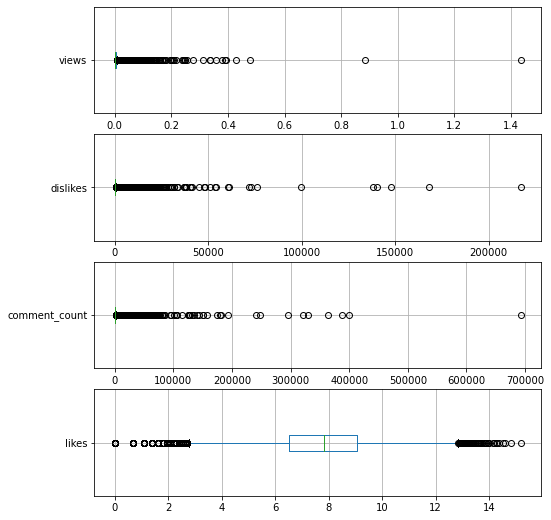

In [25]:
fig, axes = plt.subplots(4, 1, figsize=(8, 9))
for i, c in enumerate(num_col):
  _ = train[[c]].boxplot(ax=axes[i], vert=False)

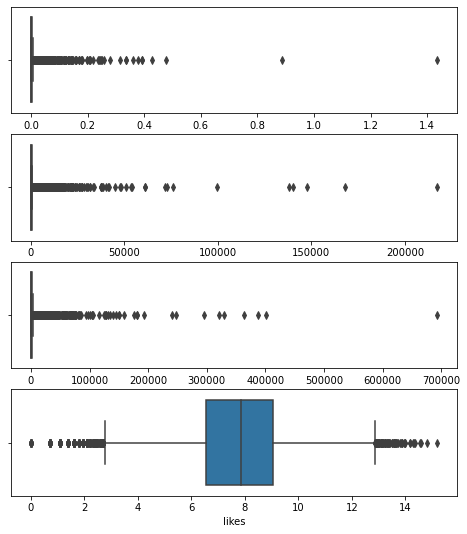

In [26]:
fig, axes = plt.subplots(4,1, figsize = (8,9))
for i, col in enumerate(num_col):
    
    sns.boxplot(x = col, data = train,ax = axes[i])

##### **Density Plots**

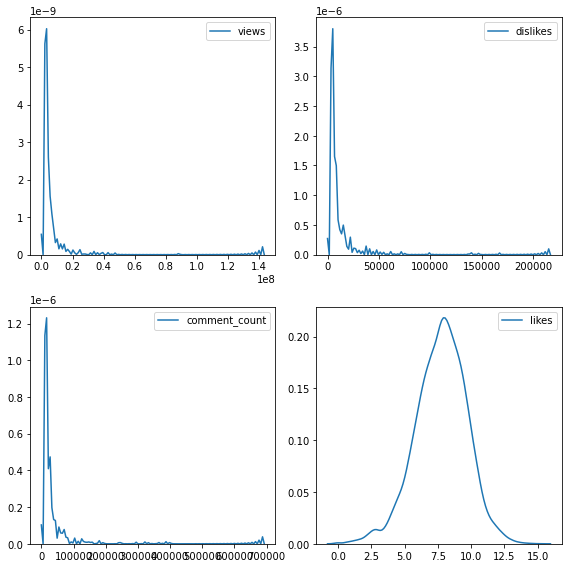

In [27]:
fig, axes = plt.subplots(2,2, figsize = (8,8))
ax = [ax for axes_1 in axes for ax in axes_1]
for i, col in enumerate(num_col):
#     _ = sns.distplot(train[col], ax = ax[i])
    plot = sns.kdeplot(train[col], ax = ax[i])
    
plt.tight_layout()

In [28]:
### Logtransformation for numerical columnsm

In [29]:
for col in num_col:
    train[col]= np.log1p(num_col[col])

### Box plots

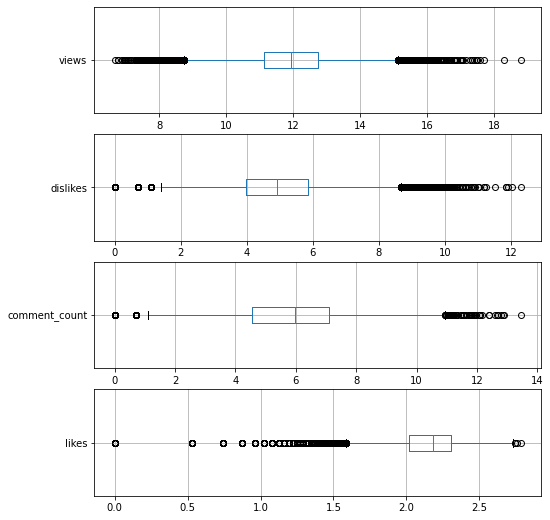

In [30]:
fig, axes = plt.subplots(4, 1, figsize=(8, 9))
for i, c in enumerate(num_col):
  _ = train[[c]].boxplot(ax=axes[i], vert=False)

### density plots

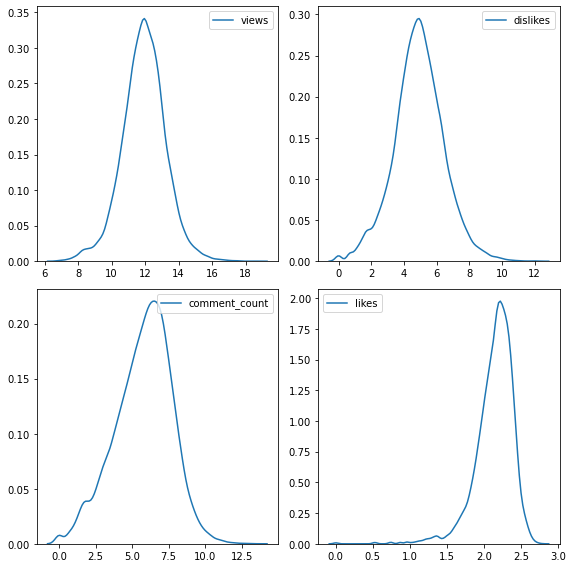

In [31]:
fig, axes = plt.subplots(2,2, figsize = (8,8))
ax = [ax for axes_1 in axes for ax in axes_1]
for i, col in enumerate(num_col):
#     _ = sns.distplot(train[col], ax = ax[i])
    plot = sns.kdeplot(train[col], ax = ax[i])
    
plt.tight_layout()

#### Bivariate anlaysis

#### Correlation heat maps

For all the numerical columns

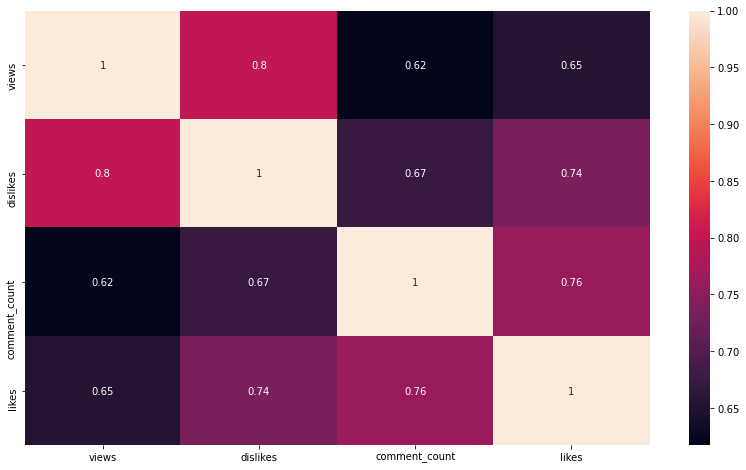

In [32]:
plt.figure(figsize=(14, 8))
sns.heatmap(train[num_col.columns].corr(), annot= True)

### pair plots

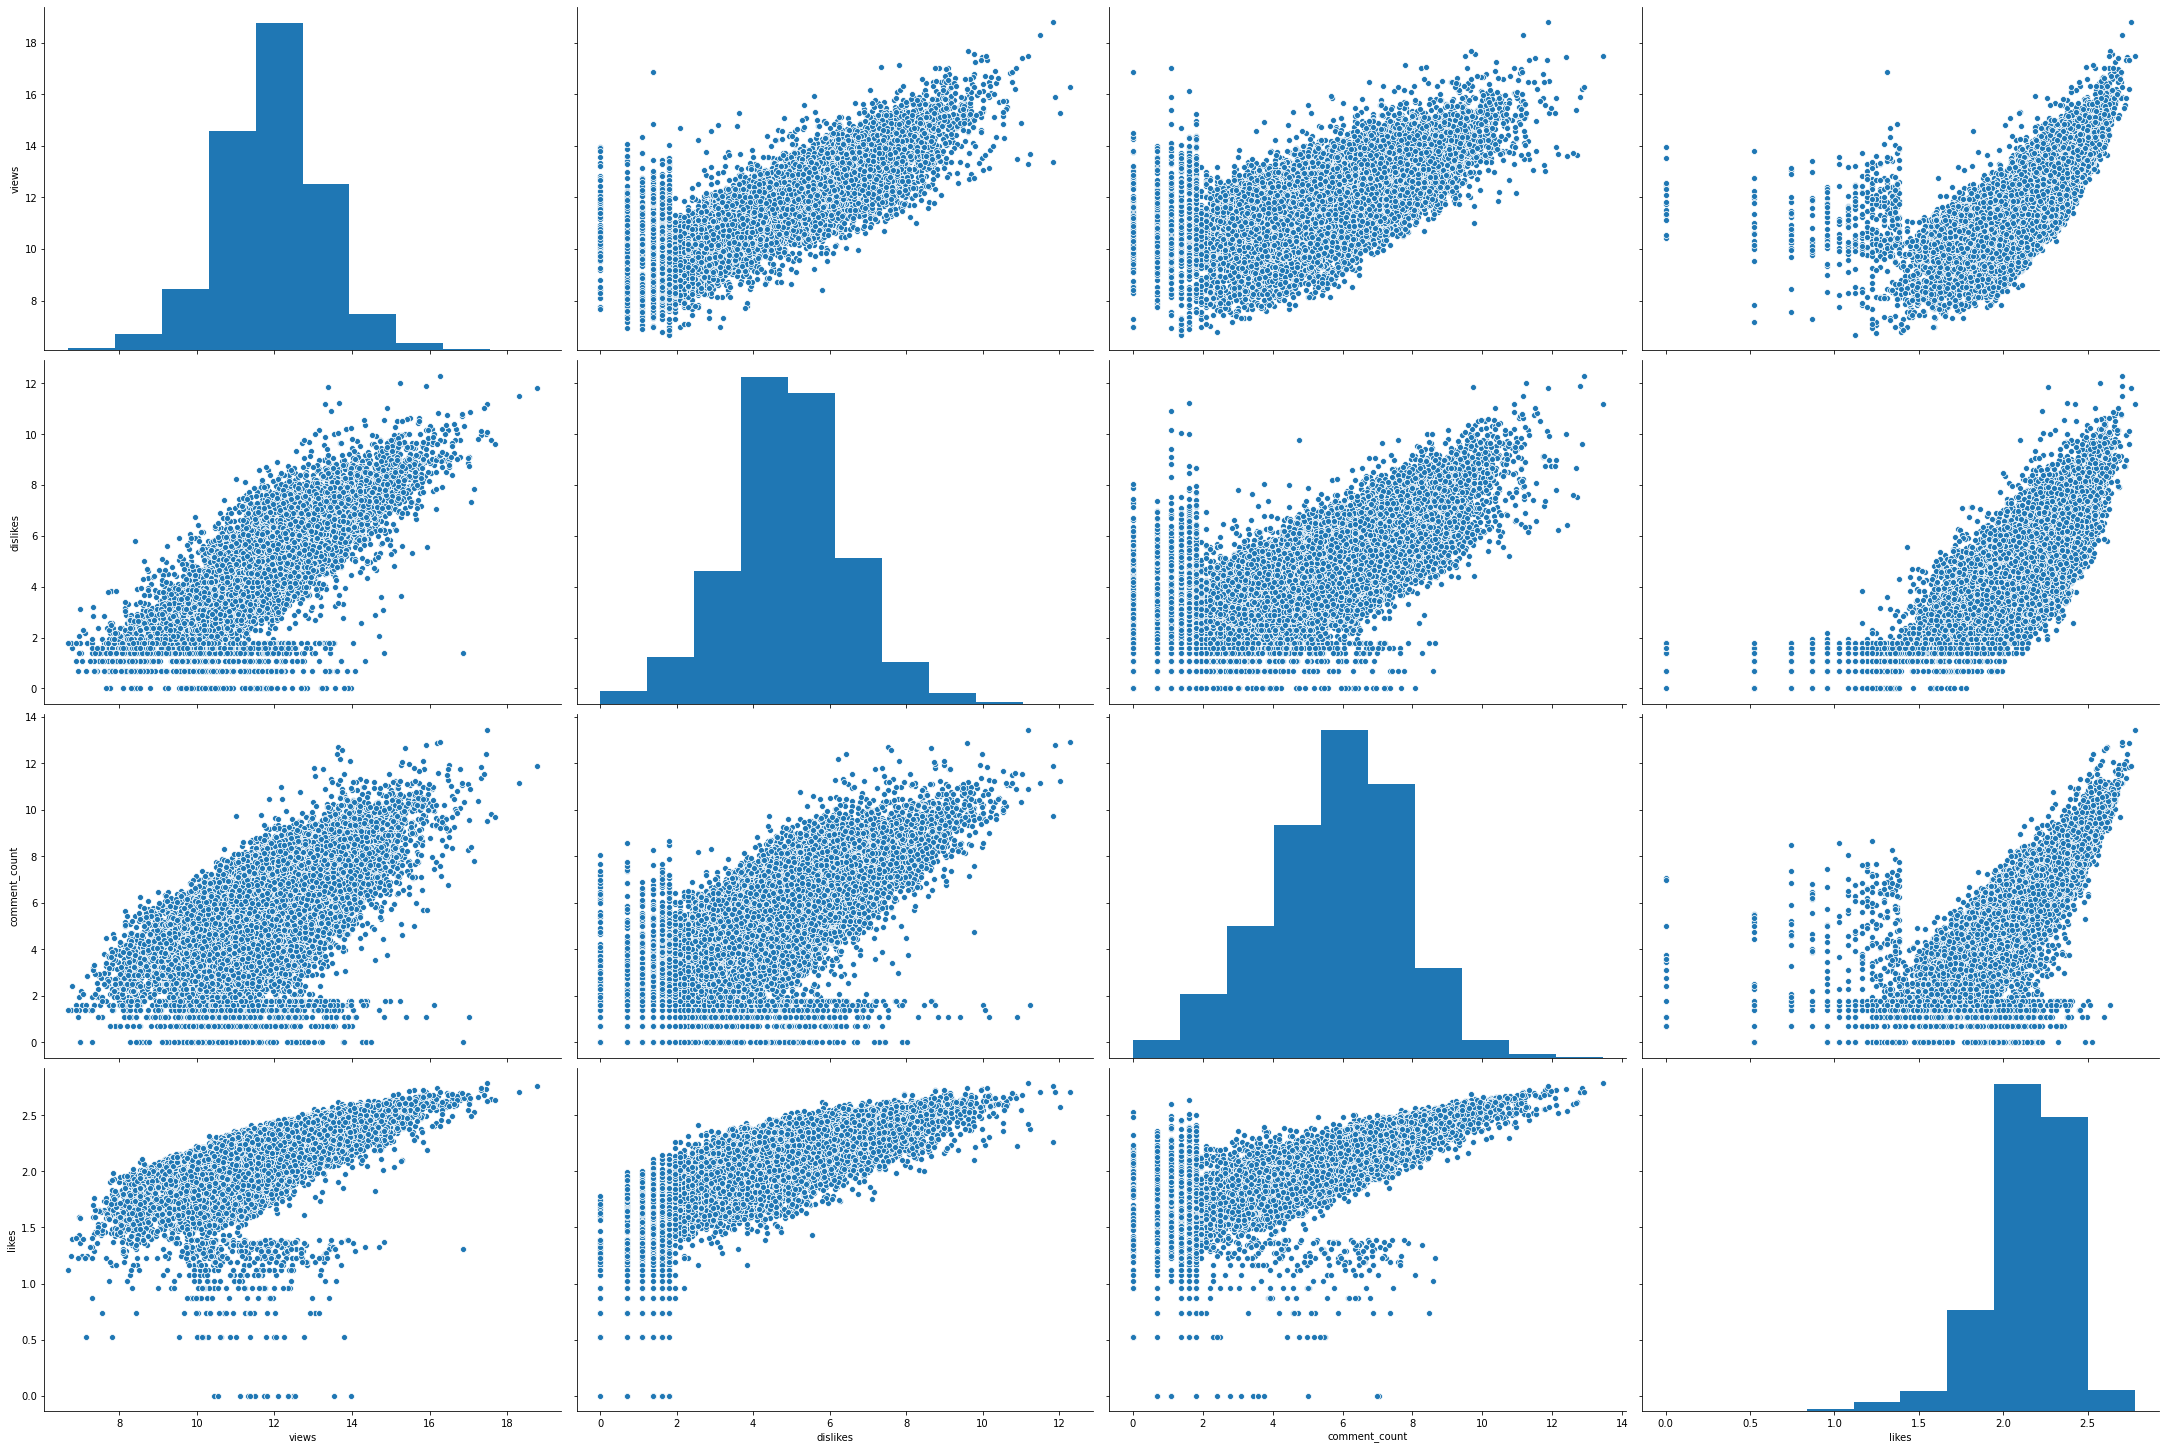

In [33]:
sns.pairplot(train[num_col.columns], height= 5, aspect= 24/16)

#### **Answering Hypothesis**

* **Do videos with more views get more likes** ?

Yes they do, we have a high correlation of 0.72 also the plot between the two variables shows this.

* **Do videos with more comments get more likes** ?

Yes they do, we have a high correlation of 0.82 also the plot between the two variables shows this.

* **Do videos with more dislikes get less likes** ?

Any form of popularity is good popularity. As the number dislikes increases, number of views increases too, and so the number of likes.

* **Do longer videos get more likes than shorter videos ?**

We don't have data to answer this question. Should we try to collect more data ? What other features could be helpful ?

### Categorical variables

### Univariate analysis

### Pie charts

In [34]:
cat_col =train[['category_id', 'country_code', 'channel_title']]


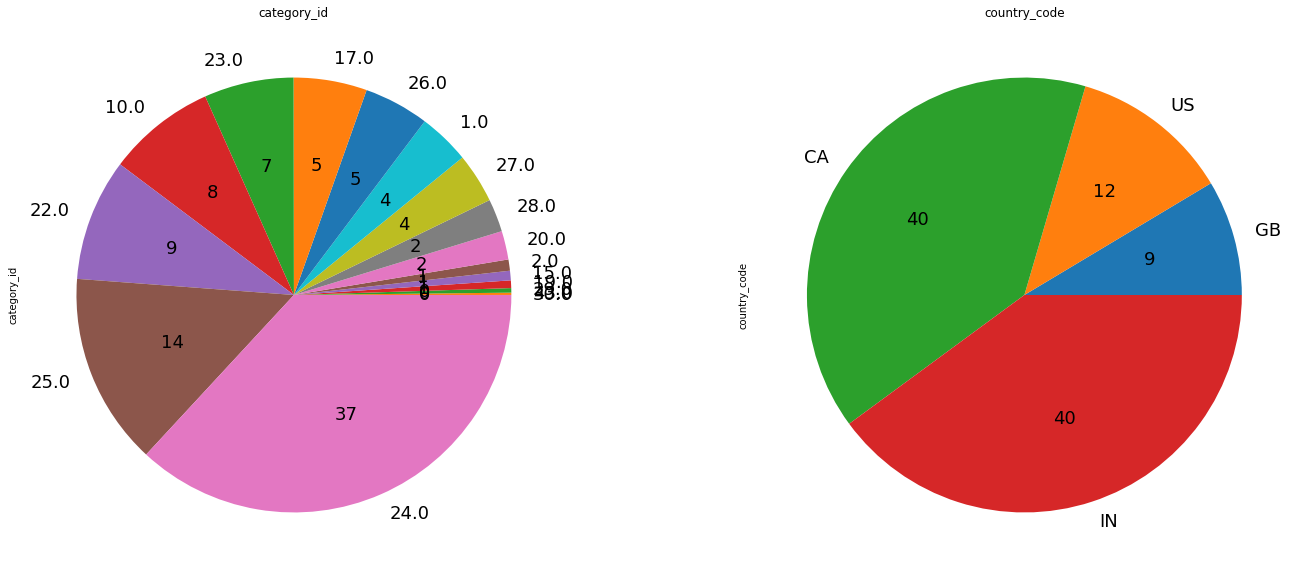

In [35]:
fig, ax = plt.subplots(1,2, figsize = (24,10))
for i, col in enumerate(['category_id', 'country_code']):
    train[col].value_counts()[::-1].plot(kind = 'pie', ax = ax[i], title = col, autopct='%.0f', fontsize = 18)
#     ax[i].set_ylabel('')

### Horizontal plots

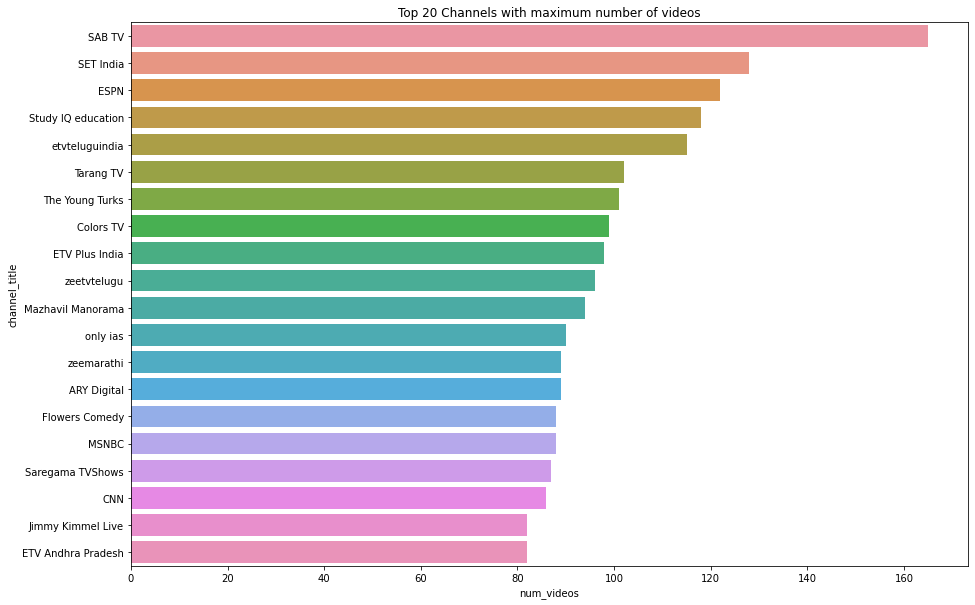

In [36]:
plt.figure(figsize=(15,10))
top_20_channels = train['channel_title'].value_counts()[:20].reset_index()
top_20_channels.columns = ['channel_title', 'num_videos']

sns.barplot(x = 'num_videos', y = 'channel_title', data = top_20_channels)
_ = plt.title("Top 20 Channels with maximum number of videos")

#### Country wise number for videos channel`

In [37]:
country_count = train.groupby(['country_code', 'channel_title']).size().reset_index()
country_count.columns = ['country_code',  'channel_title', 'num_videos']
country_count =  country_count.sort_values(by = 'num_videos', ascending = False)

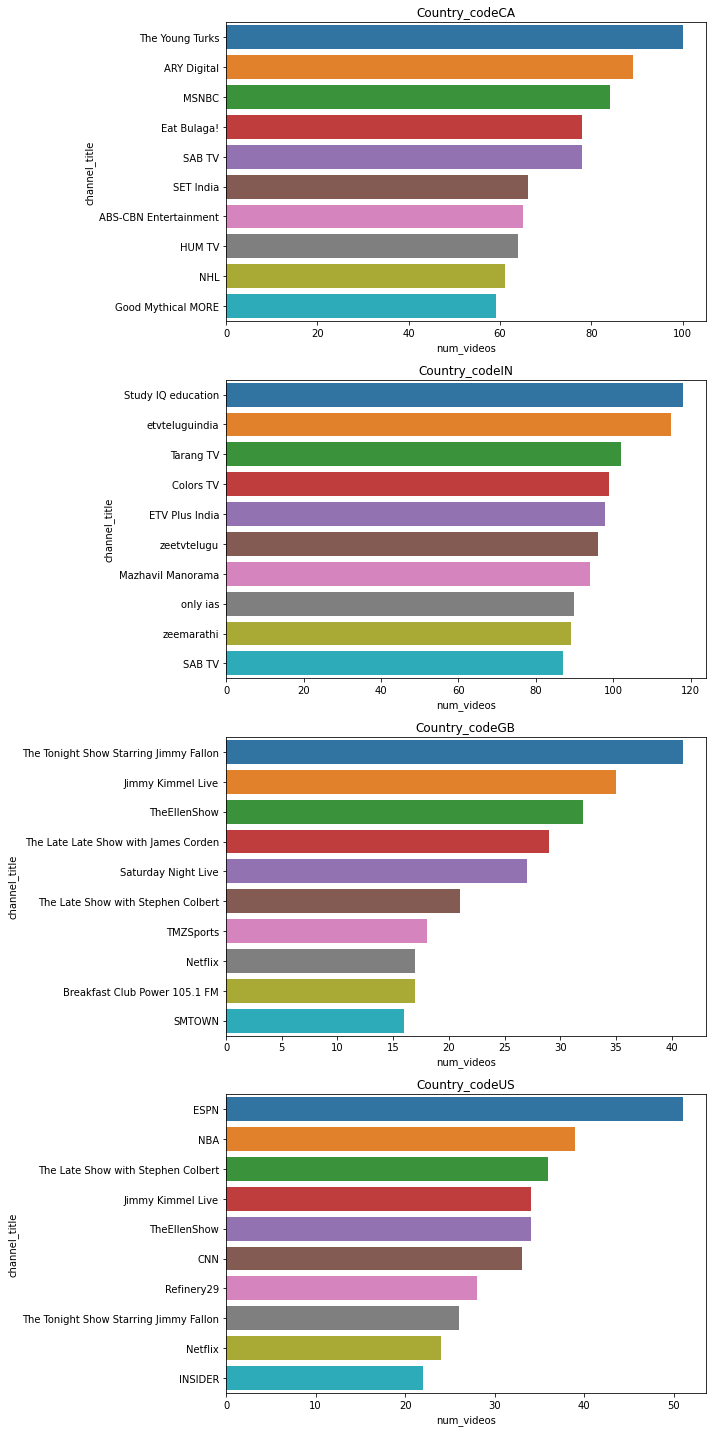

In [38]:
fig, axes = plt.subplots(4, 1, figsize=(10, 20))
for i, col in enumerate(train.country_code.unique()):
    country_data = country_count[country_count.country_code == col][:10]
    sns.barplot(x = 'num_videos',  y = 'channel_title', data =  country_data, ax =  axes[i])
    axes[i].set_title(f'Country_code{col}')
plt.tight_layout()

### Multivarite analysis

Analysing the two variables at once

#### country-wise likes for the channel

In [39]:
country_wise_likes = train.groupby(['country_code', 'channel_title']).likes.max().reset_index()
country_wise_likes = country_wise_likes.sort_values(by = 'likes', ascending = True)


/home/paramathma/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12509 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/paramathma/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12465 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/paramathma/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12514 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/paramathma/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12531 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/paramathma/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20844 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/paramathma/anaconda3/lib/python3.8/site-packages/matplotlib

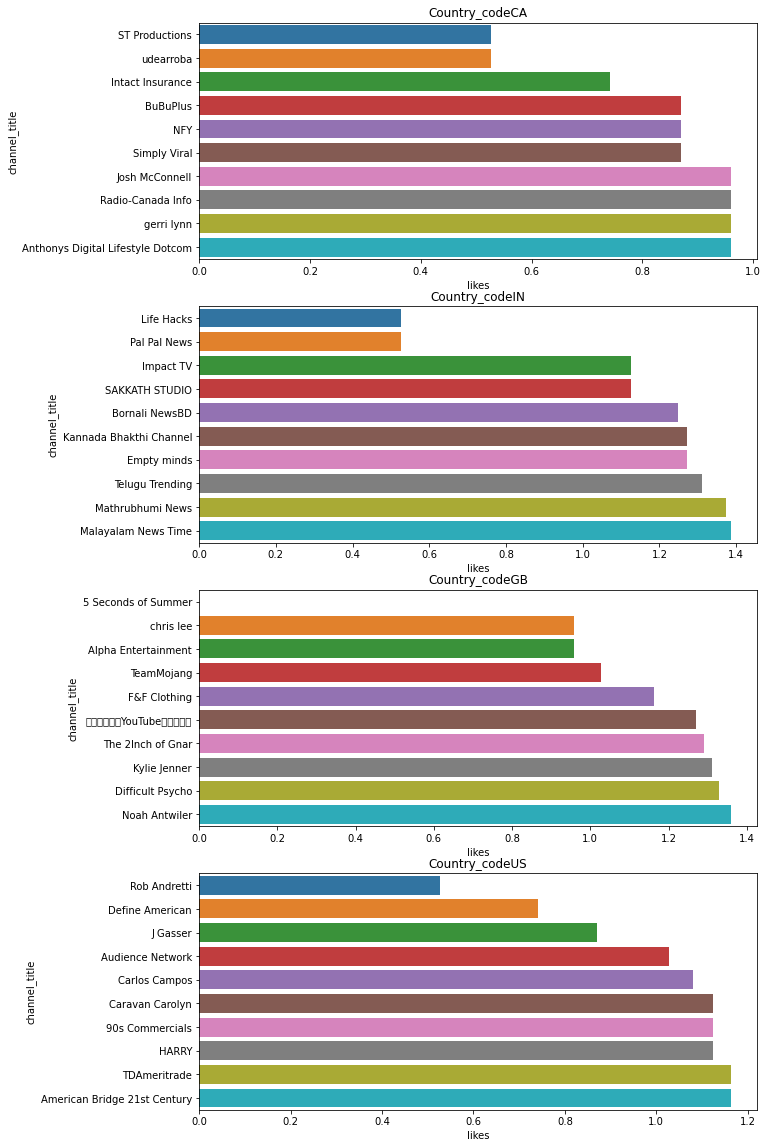

In [40]:
fig,ax = plt.subplots(4,1,figsize = (10,20))
for i , col in enumerate(train.country_code.unique()):
    channel_likes = country_wise_likes[country_wise_likes.country_code == col][:10]
    sns.barplot(x ='likes',y = 'channel_title',  data = channel_likes, ax  = ax[i])
    ax[i].set_title(f'Country_code{col}')

### Cat plots

**Likes Distribution Per Category**

In [41]:
train.columns

Index(['video_id', 'title', 'channel_title', 'category_id', 'publish_date',
       'tags', 'views', 'dislikes', 'comment_count', 'description',
       'country_code', 'likes'],
      dtype='object')

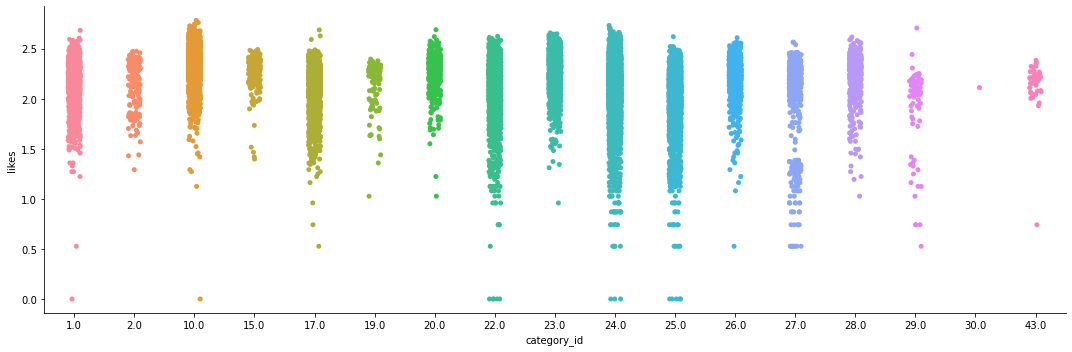

In [42]:

sns.catplot(x = 'category_id', y = 'likes', data = train,  height=5, aspect=24/8)

**Likes Distribution Per Country**

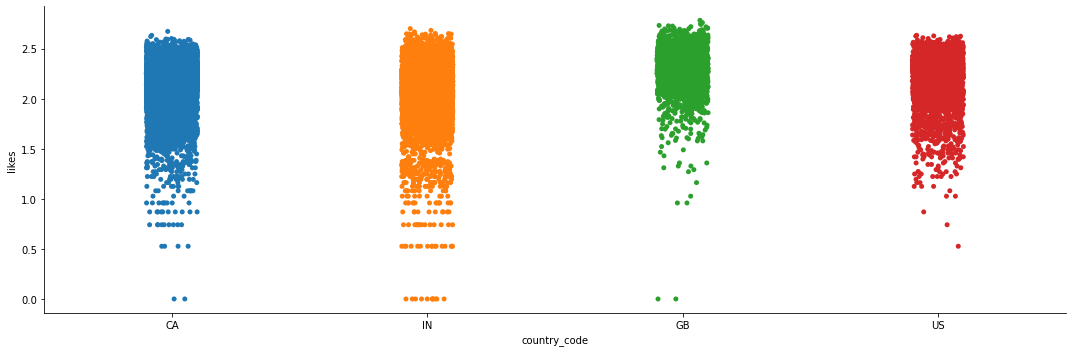

In [43]:
sns.catplot(x = 'country_code', y = 'likes', data = train, height = 5, aspect = 24/8)

**Mean Likes Per Country**

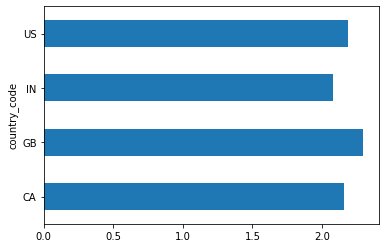

In [44]:
train.groupby('country_code').likes.mean().plot(kind = 'barh')

#### date time analysis

In [45]:
train['publish_date'] = pd.to_datetime(train['publish_date'], format='%Y-%m-%d')
test['publish_date'] = pd.to_datetime(test['publish_date'], format='%Y-%m-%d')
train['publish_date']

0       2017-12-12
1       2018-03-08
2       2018-03-26
3       2018-02-21
4       2018-05-10
           ...    
26056   2018-01-16
26057   2017-12-17
26058   2018-03-04
26059   2018-05-17
26060   2018-01-16
Name: publish_date, Length: 26061, dtype: datetime64[ns]

**Value Counts of Videos Year Wise**

**Mininum and Maximum Date**

In [46]:
train.publish_date.min(), train.publish_date.max()

(Timestamp('2006-07-23 00:00:00'), Timestamp('2018-06-14 00:00:00'))

In [47]:
train.publish_date.dt.year.value_counts()

2018    18841
2017     7132
2015       16
2016       16
2011       13
2014        9
2013        9
2009        8
2012        6
2010        4
2008        3
2007        3
2006        1
Name: publish_date, dtype: int64

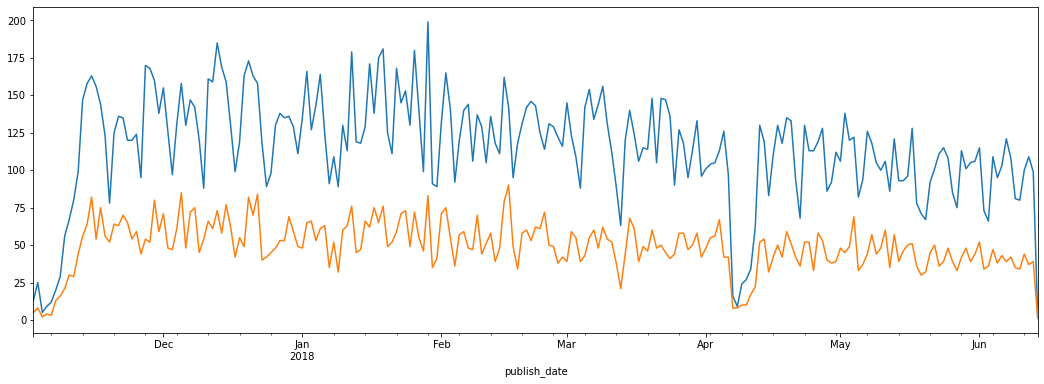

In [48]:
latest_data_train = train[train['publish_date'] > '2017-11']
latest_data_test = test[test['publish_date'] > '2017-11']
_ = latest_data_train.sort_values(by = 'publish_date').groupby('publish_date').size().plot(figsize=(18, 6))
_ = latest_data_test.sort_values(by = 'publish_date').groupby('publish_date').size().plot(figsize=(18, 6))

**Mean Likes in Data Sorted by Date**

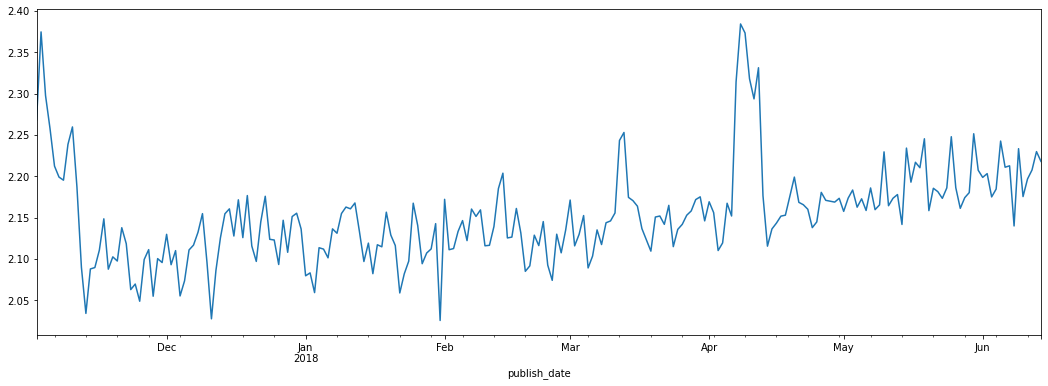

In [49]:
latest_data_train.sort_values(by = 'publish_date').groupby('publish_date')['likes'].mean().plot(figsize=(18, 6))

**Number of Videos by Country**

In [50]:
tmp = latest_data_test.groupby(['publish_date', 'country_code']).size().reset_index()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8d45b5e490>,
      dtype=object)

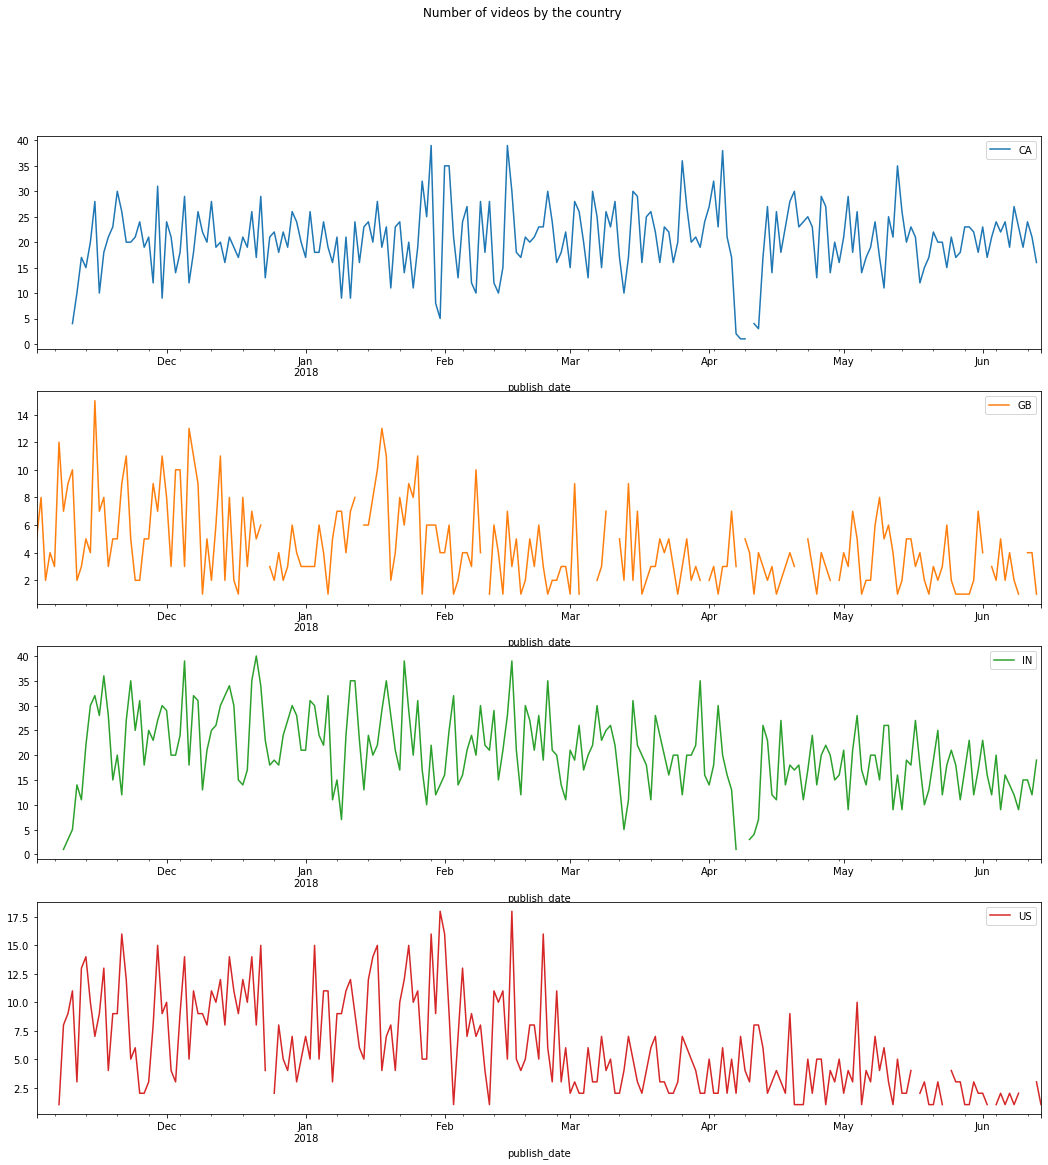

In [51]:
tmp.pivot_table(index= 'publish_date',columns= 'country_code' , values = 0).plot(subplots = True,figsize = (18,18), title = 'Number of videos by the country' , sharex=False)

### Why could be the reason for drop in Number of Videos for GB and USA ?

#### Mean Number of Likes by Country sorted by Date

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8d41f681f0>,
      dtype=object)

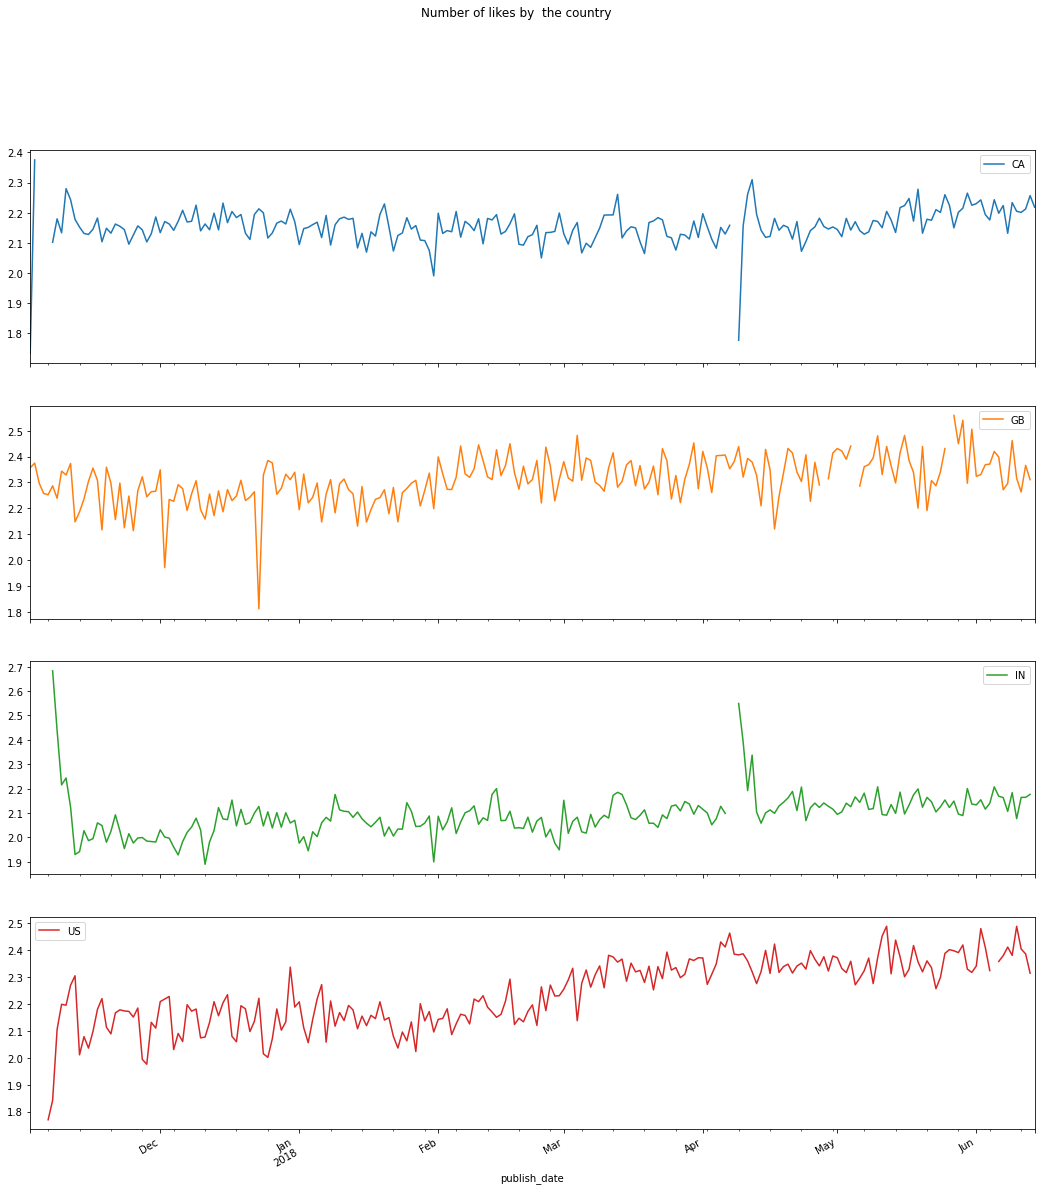

In [52]:
tmp = latest_data_train.groupby(['country_code', 'publish_date']).likes.mean().reset_index()
tmp.pivot_table(index = 'publish_date',columns = 'country_code', values = 'likes').plot(subplots = True, title = 'Number of likes by  the country', figsize = (18,20))

### Do people post more videos on weekends than weekdays ?

In [53]:
train['dayofweek'] = train.publish_date.dt.dayofweek

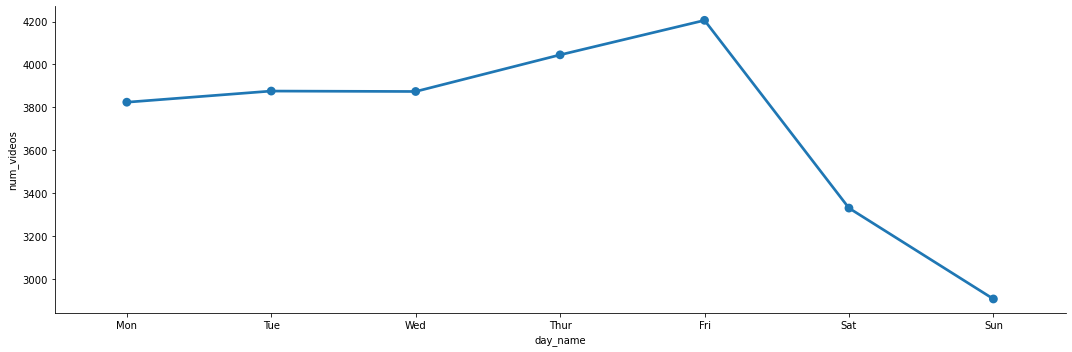

In [54]:
n_of_videos =train['dayofweek'].value_counts().sort_index().reset_index()
n_of_videos.columns = ['day_name', 'num_videos']
n_of_videos['day_name'] = ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']
sns.catplot(x = 'day_name', y = 'num_videos', data = n_of_videos, kind = 'point', aspect=24/8)


### Text data

In [55]:
text_cols = ['title', 'tags', 'description']

#### word clouds

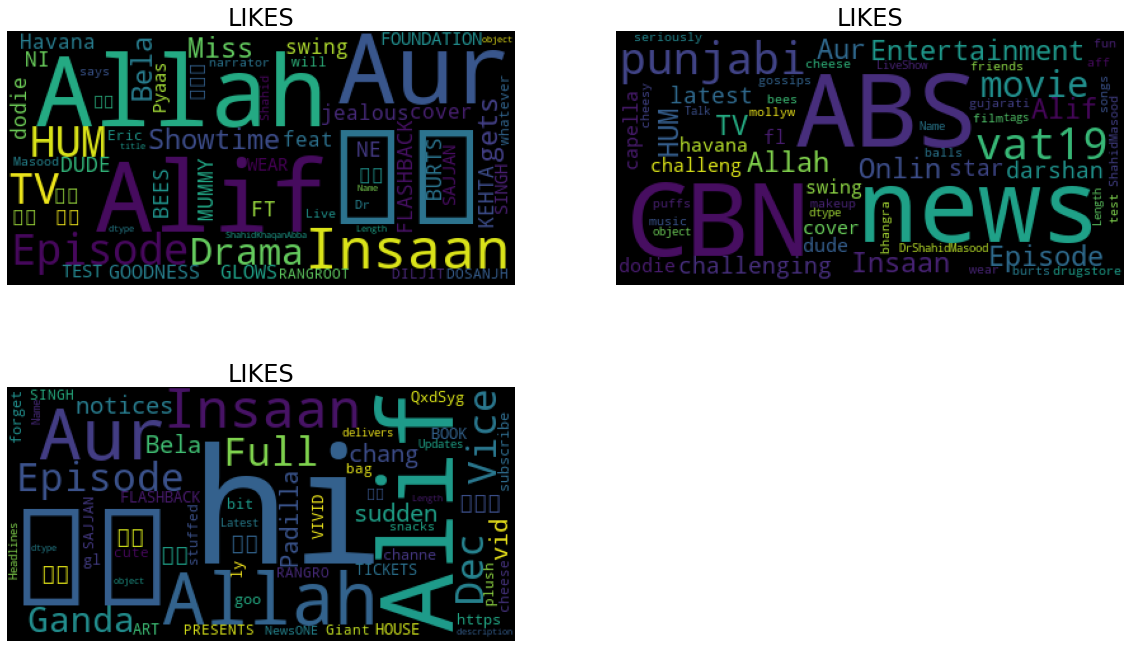

In [56]:
from wordcloud import WordCloud, STOPWORDS
wc = WordCloud(stopwords= set(list(STOPWORDS)+['|']), random_state=1)
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
axes = [ax for axes_row in axes for ax in axes_row]

for i, n in enumerate(text_cols):
    op = wc.generate(str(train[n]))
    axes[i].imshow(op)
    axes[i].set_title(c.upper(), fontsize=24)
    axes[i].axis('off')
_ = fig.delaxes(axes[3])

In [60]:
def country_plot(country_code ='IN'):
    country = train[train['country_code']== country_code]
    country = train[train.likes > 10]
    fig,  ax = plt.subplots(2,2, figsize = (20,12))
    ax = [j for i in ax for j in i]
    
    for i ,c in enumerate(text_cols):
        op = wc.generate(str(country[c]))
        _ = ax[i].imshow(op)
        _ = ax[i].set_title(c.upper(), fontsize=24)
        _ = ax[i].axis('off')

    fig.delaxes(ax[3])
    _ = plt.suptitle(f"Country Code: '{country_code}'", fontsize=30)

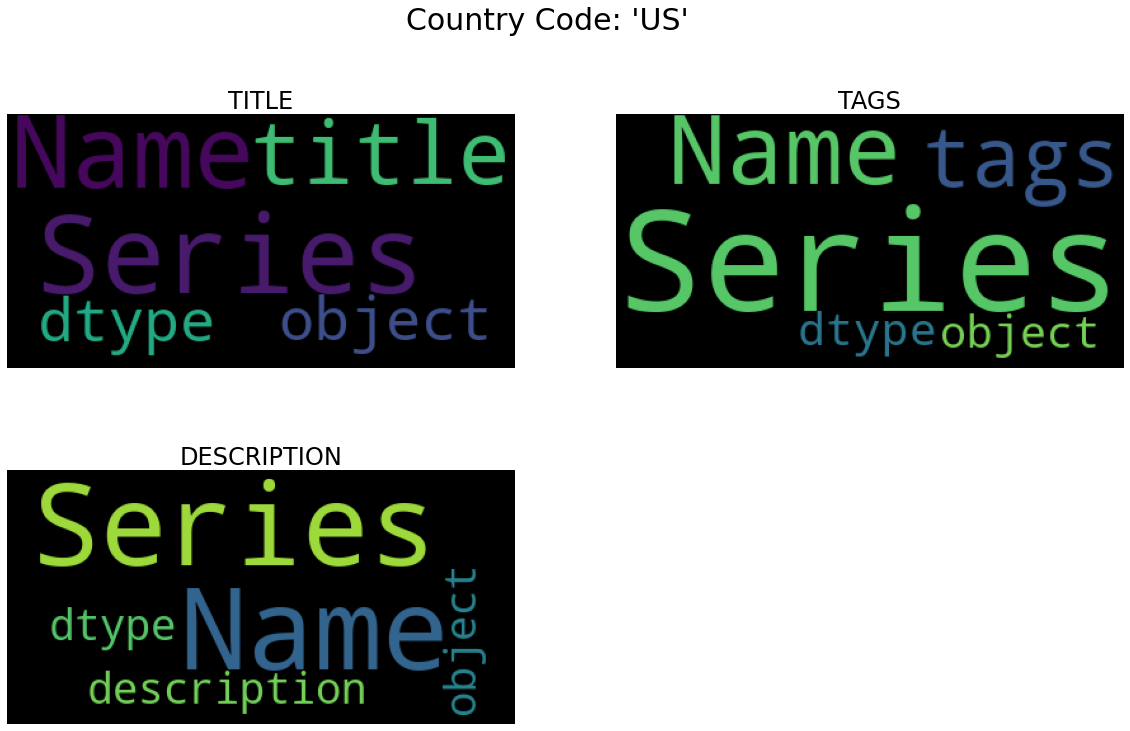

In [61]:
country_plot('US')

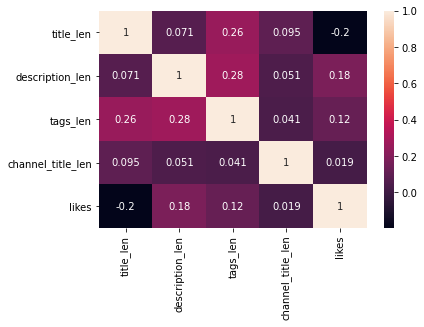

In [63]:
train['title_len'] = train['title'].apply(lambda x: len(x))
train['description_len'] = train['description'].apply(lambda x: len(x))
train['tags_len'] = train['tags'].apply(lambda x: len(x))
train['channel_title_len'] = train['channel_title'].apply(lambda x: len(x))

_  = sns.heatmap(train[['title_len', 'description_len', 'tags_len', 'channel_title_len', 'likes']].corr(), annot = True)

In [64]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26061 entries, 0 to 26060
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   video_id           26061 non-null  int64         
 1   title              26061 non-null  object        
 2   channel_title      26061 non-null  object        
 3   category_id        26061 non-null  float64       
 4   publish_date       26061 non-null  datetime64[ns]
 5   tags               26061 non-null  object        
 6   views              26061 non-null  float64       
 7   dislikes           26061 non-null  float64       
 8   comment_count      26061 non-null  float64       
 9   description        26061 non-null  object        
 10  country_code       26061 non-null  object        
 11  likes              26061 non-null  float64       
 12  dayofweek          26061 non-null  int64         
 13  title_len          26061 non-null  int64         
 14  descri

### Pridictive modeling

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')

import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import KFold

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression, ElasticNet

from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.simplefilter('ignore')

In [69]:
ID_COL, TARGET_COL = 'video_id', 'likes'

num_cols = ['views', 'dislikes', 'comment_count']
cat_cols = ['category_id', 'country_code']
text_cols = ['title', 'channel_title', 'tags', 'description']
date_cols = ['publish_date']


In [70]:

def download_file(predict_data, file_name= 'analytics_vidya_hackthon_sub'):
    sample['term_deposit_subscribed'] = predict_data
    predict_csv = sample.to_csv()
    fp = open(file_name, 'w')
    fp.write(predict_csv)
    fp.close()

**Steps to Make a Baseline Regression Model**

1. Concatenate/Join the train and test Datasets. All kinds of processing must be performed on both train and test datasets together.

2. Convert all Categorical Variables to numbers. We will be use OneHot Encoding for this. 

3. Fill Null Values. This can be followed by other data processing and feature engineering steps, but we will go into it later.

4. Split the dataset back into train and test datasets.

5. Split the train set into train and validation sets.

6. Fit a regression Model on train, check its results on validation set.

7. Predict for the test set.

8.  Save the submission as a csv file and submit the model on AV.

In [74]:
train.shape, test.shape, sample.shape

((26061, 17), (11170, 11), (11170, 2))


**2. Encoding categorical columns.**

There are multiple ways to encoded categorical variables. For the sake of simplicity, we will be using One-Hot Encoding.

In [77]:
train = pd.get_dummies(train, columns=cat_cols)

In [80]:
test = pd.get_dummies(test, columns=cat_cols)

**3. Filling Null Values**

As seen earlier in our EDA, our dataset contains null values. There could be multiple ways to fill our Null Values, but for now we will fill it with a large negative random number say -999

In [81]:
train.isna().sum()

video_id             0
title                0
channel_title        0
publish_date         0
tags                 0
views                0
dislikes             0
comment_count        0
description          0
likes                0
dayofweek            0
title_len            0
description_len      0
tags_len             0
channel_title_len    0
category_id_1.0      0
category_id_2.0      0
category_id_10.0     0
category_id_15.0     0
category_id_17.0     0
category_id_19.0     0
category_id_20.0     0
category_id_22.0     0
category_id_23.0     0
category_id_24.0     0
category_id_25.0     0
category_id_26.0     0
category_id_27.0     0
category_id_28.0     0
category_id_29.0     0
category_id_30.0     0
category_id_43.0     0
country_code_CA      0
country_code_GB      0
country_code_IN      0
country_code_US      0
dtype: int64

**4. Split the train set into train and validation sets.**

We will use 80-20 split with 80% of the rows belonging to training data. Stratified Sampling is necessary, since the dataset is highly imbalanced. Stratified sampling ensures that the minority class is distributed proportionally among the two classes.

In [84]:
train.sample(2
            )

,video_id,title,channel_title,publish_date,tags,views,dislikes,comment_count,description,likes,...,category_id_26.0,category_id_27.0,category_id_28.0,category_id_29.0,category_id_30.0,category_id_43.0,country_code_CA,country_code_GB,country_code_IN,country_code_US
3553,81106,జనవరి 1 తేదీన మగబిడ్డకు జన్మనిచ్చిన మంచు విష్ణ...,9Roses Media,2018-01-02,"#9RosesMedia|""జనవరి 1 తేదీన మగబిడ్డకు జన్మనిచ్...",11.324630,3.401197,3.663562,జనవరి 1 తేదీన మగబిడ్డకు జన్మనిచ్చిన మంచు విష్ణ...,1.863574,...,0,0,0,0,0,0,0,0,1,0
12331,75509,New Year's Day- Taylor Swift (Cover) by Niki a...,Niki and Gabi,2017-12-31,"niki and gabi|""nikiandgabibeauty""|""new year's ...",12.998332,6.932448,7.794823,"In honor of it being New Year's Eve, we wanted...",2.442556,...,1,0,0,0,0,0,1,0,0,0
